Student: Antonio Neto

**Objective**

The goal of this project is to build a convolutional neural network (CNN) based on the LeNet-5 architecture to classify handwritten digits from the MNIST dataset. The model is trained using holdout validation and evaluated using accuracy metrics and a confusion matrix.

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step - accuracy: 0.7672 - loss: 0.7982 - val_accuracy: 0.9545 - val_loss: 0.1542
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9585 - loss: 0.1335 - val_accuracy: 0.9670 - val_loss: 0.1084
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.9749 - loss: 0.0826 - val_accuracy: 0.9736 - val_loss: 0.0833
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.9780 - val_loss: 0.0746
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.9826 - loss: 0.0545 - val_accuracy: 0.9804 - val_loss: 0.0680
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.9812 - val_loss: 0.0631
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9871 - loss: 0.0377 - val_accuracy: 0.9832 - val_loss: 0.0596
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9889 - loss: 0.0311 - 

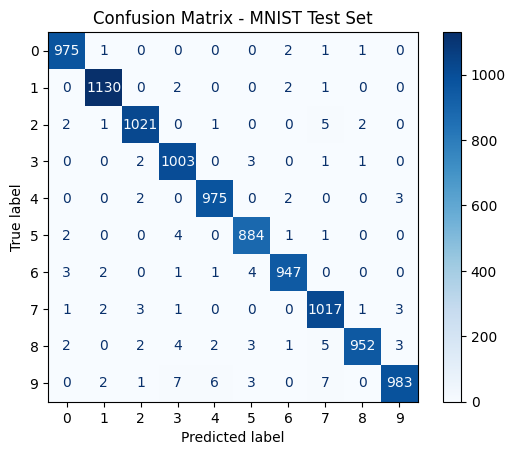

In [2]:
# Step a: Load MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_full = x_train_full[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Step b: Holdout split (60% train, 20% val, 20% test)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.25, random_state=42)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Step c: LeNet-5 Model
model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.AveragePooling2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.AveragePooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step d: Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - MNIST Test Set")
plt.show()
